In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({
'Usn': ['4VP22AI001','4VP22AI002','4VP22AI003','4VP22AI004','4VP22AI005','4VP22AI006','4VP22AI007','4VP22AI008','4VP22AI009','4VP22AI010','4VP22AI011','4VP22AI012','4VP22AI013','4VP22AI014','4VP22AI015','4VP22AI016','4VP22AI017','4VP22AI018','4VP22AI019','4VP22AI020','4VP22AI021','4VP22AI022','4VP22AI023','4VP22AI024','4VP22AI025','4VP22AI026','4VP22AI027','4VP22AI028','4VP22AI029','4VP22AI030','4VP22AI031','4VP22AI032','4VP22AI033','4VP22AI034','4VP22AI035','4VP22AI036','4VP22AI037','4VP22AI038','4VP22AI039','4VP22AI040','4VP22AI041','4VP22AI042','4VP22AI043','4VP22AI044','4VP22AI045','4VP22AI046','4VP22AI047','4VP22AI048','4VP22AI049','4VP22AI050','4VP22AI051','4VP22AI052','4VP22AI053','4VP22AI054','4VP22AI055','4VP22AI056','4VP22AI057','4VP22AI058','4VP22AI059','4VP22AI060','4VP22AI061'],
'Marks': [58,76,78,84,80,72,68,68,80,86,89,79,73,75,72,76,73,77,68,76,78,63,71,81,81,74,73,69,82,78,83,70,85,81,73,83,63,63,78,88,73,66,74,77,79,71,55,75,71,81,85,79,65,80,70,75,66,74,77,81,74]
})
data.to_csv('Marks.csv', index=False)

In [3]:
print("Dataset Loaded from Marks.csv")
data = pd.read_csv('Marks.csv')
# Preview the dataset
print("Dataset Preview:")
print(data.head())

Dataset Loaded from Marks.csv
Dataset Preview:
          Usn  Marks
0  4VP22AI001     58
1  4VP22AI002     76
2  4VP22AI003     78
3  4VP22AI004     84
4  4VP22AI005     80


In [6]:
numerical_column = 'Marks'
data_num = data[numerical_column]
print(data_num)

0     58
1     76
2     78
3     84
4     80
      ..
56    66
57    74
58    77
59    81
60    74
Name: Marks, Length: 61, dtype: int64


In [7]:
mean_val = data_num.mean()
median_val = data_num.median()
mode_val = data_num.mode()[0]
std_dev = data_num.std()
variance = data_num.var()
range_val = data_num.max() - data_num.min()
# Print statistics
print("\nStatistics for Numerical Column:")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_val}")


Statistics for Numerical Column:
Mean: 74.9672131147541
Median: 75.0
Mode: 73
Standard Deviation: 7.075703058388743
Variance: 50.0655737704918
Range: 34


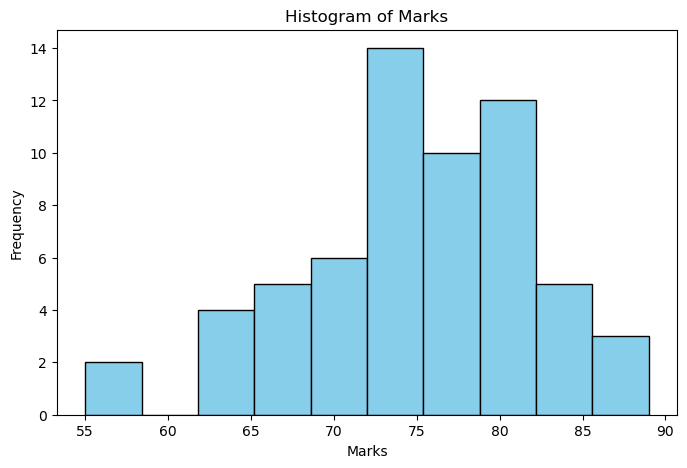

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(data_num, bins=10, color='skyblue', edgecolor='black')
plt.title(f"Histogram of {numerical_column}")
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()

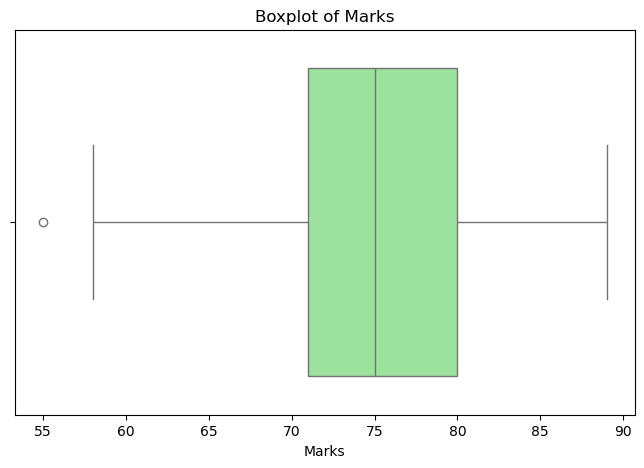

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_num, color='lightgreen')
plt.title(f"Boxplot of {numerical_column}")
plt.show()

In [10]:
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data_num[(data_num < lower_bound) | (data_num > upper_bound)]
print("\nOutliers:")
print(outliers)


Outliers:
46    55
Name: Marks, dtype: int64


In [14]:
def mark_group(Marks):
    if Marks <= 35:
        return 'Fail'
    elif 36 <= Marks <= 70:
        return 'Average'
    else:
        return 'Outstanding'
data['Mark Group'] = data['Marks'].apply(mark_group)

In [15]:
categorical_column = 'Mark Group'
data_cat = data[categorical_column]
# Compute frequency of each category
category_counts = data_cat.value_counts()
print("\nCategory Frequencies:")
print(category_counts)


Category Frequencies:
Mark Group
Outstanding    47
Average        14
Name: count, dtype: int64


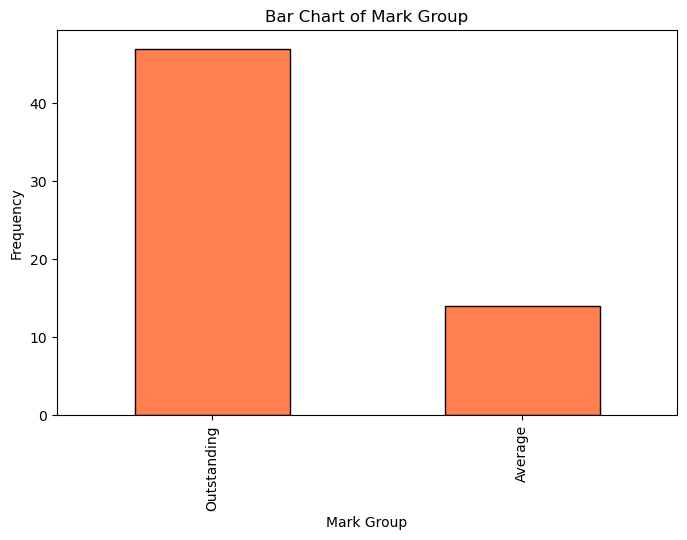

In [16]:
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='coral', edgecolor='black')
4
plt.title(f"Bar Chart of {categorical_column}")
plt.xlabel(categorical_column)
plt.ylabel("Frequency")
plt.show()

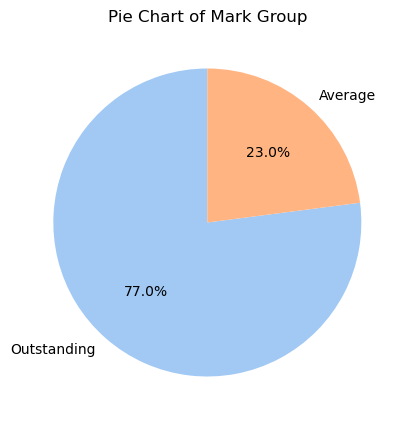

In [17]:
plt.figure(figsize=(8, 5))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
colors=sns.color_palette('pastel'))
plt.title(f"Pie Chart of {categorical_column}")
plt.ylabel("") # Remove y-axis label
plt.show()